# Name: Thy Le, Gage Franklin, Josh Rist
# CS 3851 - 012
# Lab 2: Iterative Algorithm - Problem 2: Determining whether a polygon is convex or not

## 1. Decision rule

### ***Code to graph a concave and a convex polygon***

In [51]:
import matplotlib.pyplot as plt
def graph(point_list):
    point_list.append(point_list[0])
    xs, ys = zip(*point_list)
    plt.figure()
    plt.plot(xs, ys)
    plt.show()

### ***Convex Polygon***

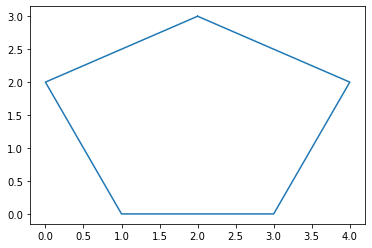

In [52]:
convex_test = [[2,3], [0, 2], [1,0], [3,0], [4, 2], [2,3]]
graph(convex_test)

### ***Concave Polygon***

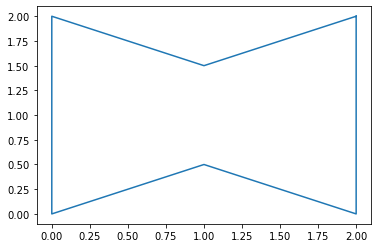

In [53]:
concave_test = [[2.0, 2.0], [1.0, 1.5], [0.0, 2.0], [0.0, 0.0], [1.0, 0.5], [2.0, 0.0], [2.0, 2.0]]
graph(concave_test)

From the point sets and the generated graphs above, it is shown that a set of 3 points would form an internal angle of less than of equal to 180 degrees for a convex polygon. On the other hand, a set of 3 points would form an internal angle of more than 180 degrees for a concave polygon. Furthermore, regarding to the rules of a convex polygon, the total degree of all inner angles should be equal to (number of sides - 2) * 180. With that being said, we decided to focus on the total degrees of all angles of the polygon to determine whether it is convex or concave. In order to do so, we will iterate through the point list and take 3 points at a time and calculate the angle degree that is formed by these 3 points by the law of cosine, repeat the process to add the degrees of all angles and comparing with the result of the calculation (number of sides - 2) * 180. If the total degree mathches, then it's a convex polygon and it's a concave polygon if otherwise.

## 2. Pseudocode and implementation for an algorithm

### ***Pseudocode***

***def determine_convex(point_list):***

    initialize total angle variable
    
    loop through the list of points:
    
        if the current index is the last index in the list
        
            apply law of cosine(previous index, current index,  first index)
            
            add result from above to total
            
        else
        
            apply law of cosine(previous index, current index,  next index)
            
            add result from above to total
            
    calculate the expected degree by (# of points - 2)*180
    
    if total is equal to expected
    
        shape is convex
        
    else
    
        shape is concave

### ***Implementation***

In [54]:
import math

def calculate_side_length(p1, p2):
    xDiff = p2[0] - p1[0]
    yDiff = p2[1] - p1[1]
    length = math.sqrt(math.pow(xDiff, 2) + math.pow(yDiff, 2))
    return length

In [55]:
def calculate_angle(a, b, c):
    # cos(angle B) = (ab^2 + bc^2 - ac^2)/(2ac): Middle point
    ab = calculate_side_length(a, b)
    abSquare = math.pow(ab, 2)

    ac = calculate_side_length(a, c)
    acSquare = math.pow(ac, 2)
    
    bc = calculate_side_length(b, c)
    bcSquare = math.pow(bc, 2)
    
    cosAngleB = (abSquare + bcSquare - acSquare)/(2 * ab * bc)
    angleB = math.degrees(math.acos(cosAngleB))
    return angleB

In [56]:
def determine_convex(point_list):
    total = 0
    for i in range(1, len(point_list)):
        if(i == len(point_list) - 1):
            angle = calculate_angle(point_list[i - 1], point_list[i], point_list[0])
            total += angle
            angle = calculate_angle(point_list[i], point_list[0], point_list[1])
            total += angle
        else:
            angle = calculate_angle(point_list[i - 1], point_list[i], point_list[i+1])
            total += angle

    expect_degree = (len(point_list) - 2) * 180
    if(round(total) == expect_degree):
        return True
    return False

In [65]:
def generate_convex_shape(requested_sides):
    delta_angle = 2*math.pi/requested_sides
    current_angle = 0
    points = []
    for i in range(1, requested_sides):
        x = math.cos(current_angle)
        y = math.sin(current_angle)
        current_angle += delta_angle
        points.append([x, y])
    return points


def generate_concave_shape(requested_sides):
    delta_angle = 2*math.pi/requested_sides
    current_angle = 0
    points = []
    for i in range(1, requested_sides):
        if(i % 2 == 0):
            x = math.cos(current_angle) + 0.1
            y = math.sin(current_angle) + 0.1
        else:
            x = math.cos(current_angle)
            y = math.sin(current_angle)
        current_angle += delta_angle
        points.append([x, y])
    return points

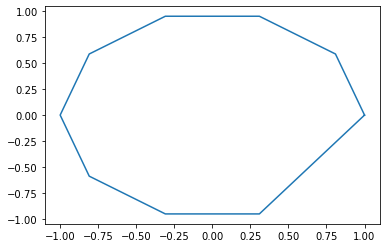

A polygon with 10 sides and took 0.00013359999866224825 seconds to determine to be a convex polygon


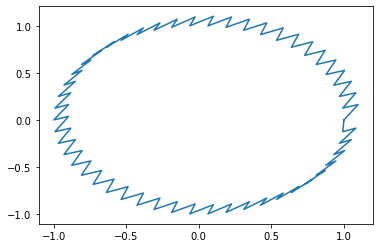

A polygon with 100 sides and took 0.0008605000039096922 seconds to determine to be a concave polygon


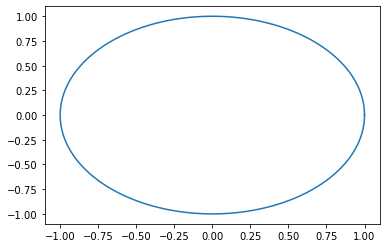

A polygon with 1000 sides and took 0.0037305000005289912 seconds to determine to be a convex polygon


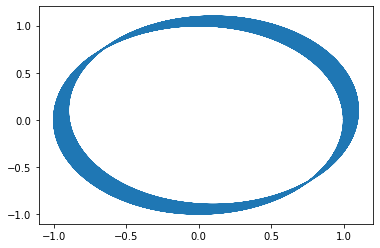

A polygon with 10000 sides and took 0.04714320000493899 seconds to determine to be a concave polygon


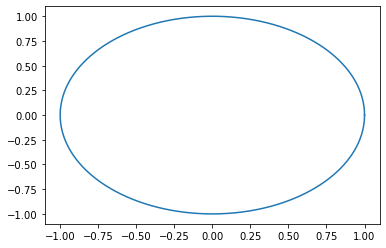

A polygon with 100000 sides and took 0.5342859000011231 seconds to determine to be a convex polygon


In [69]:
import time
import numpy as np
from scipy.stats import linregress
list_sizes = [10, 100, 1000, 10000, 100000]
list_times = []


def print_result(num_sides, elapsed, is_convex):
    convex = "a convex polygon"
    if is_convex == False:
        convex = "a concave polygon"
    print("A polygon with", num_sides, "sides and took", elapsed, "seconds to determine to be", convex)

    
def main():
    for i in range(len(list_sizes)):
        point_list = generate_concave_shape(list_sizes[i])
        if(i % 2 == 0):
            point_list = generate_convex_shape(list_sizes[i])
        start_time = time.perf_counter()
        is_convex = determine_convex(point_list)
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        list_times.append(elapsed)
        graph(point_list)
        print_result(list_sizes[i], elapsed, is_convex)


if __name__ == "__main__":
    main()

## 3. Why the algorithm is correct (1 - 3 paragraphs)

## 4. Analysis of worst-case run time using asymptotic notation

In [70]:
def analyze(list_times, list_sizes):
    temp_times = list_times.copy()
    for i in range(len(list_sizes)):
        print("Number of sides: ", list_sizes[i], " Run time: ", temp_times[i])
    print("Slope m is ", linregress(np.log(list_sizes), np.log(temp_times))[0])
analyze(list_times, list_sizes)

Number of sides:  10  Run time:  0.00013359999866224825
Number of sides:  100  Run time:  0.0008605000039096922
Number of sides:  1000  Run time:  0.0037305000005289912
Number of sides:  10000  Run time:  0.04714320000493899
Number of sides:  100000  Run time:  0.5342859000011231
Slope m is  0.8942602700474559


## 5. Table of test cases (expected result, actual result)

## 6. Table and graph of benchmarking